# Capstone Two - Health Insurance Data 
                                                                          Created by Mariko Egami

Look into different features to observe the relationship based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.

## Overview 

Columns:

* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: number of children covered by health insurance / number of dependents
* smoker: smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: individual medical costs billed by health insurance

### Step1: Import dataset into a Jupyter Notebook 

In [3]:
import pandas as pd
df= pd.read_excel(r'C:\Users\marik\OneDrive\Desktop\Springboard Projects\Unit 16_Capstone2\insurance.xlsx',header=0)
print(df.head())
print(df.columns)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


### Step2: Data Cleansing

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md 
from matplotlib.dates import DateFormatter
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import matplotlib.ticker as mtick

In [5]:
# Converting text to numbers to calulate correlations.
'''
After you run this code, re-running will cause the error. convert to numbers to check correlation
'''
df['sex'].replace(['male','female'],[0,1],inplace=True)
df['smoker'].replace(['no','yes'],[0,1],inplace=True)
df['region'].replace(['southwest','southeast','northwest','northeast'],[1,2,3,4],inplace=True)
print(df.head())

   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       1  16884.92400
1   18    0  33.770         1       0       2   1725.55230
2   28    0  33.000         3       0       2   4449.46200
3   33    0  22.705         0       0       3  21984.47061
4   32    0  28.880         0       0       3   3866.85520


In [6]:
# Check if conversion (to numbers) are done correctly.
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,2.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


In [7]:
# converting back numbmers to text so easier to see when it's showing as label
df = df.assign(gender = np.where(df['sex']==1, 'female', 'male'))
df = df.assign(smoker_txt = np.where(df['smoker']==1, 'yes', 'no'))
print(df.head())

   age  sex     bmi  children  smoker  region      charges  gender smoker_txt
0   19    1  27.900         0       1       1  16884.92400  female        yes
1   18    0  33.770         1       0       2   1725.55230    male         no
2   28    0  33.000         3       0       2   4449.46200    male         no
3   33    0  22.705         0       0       3  21984.47061    male         no
4   32    0  28.880         0       0       3   3866.85520    male         no


In [9]:
# Converting back to text to show in plot
def region_name(x):
    if x == 1: 
        return 'southwest'
    elif x == 2:
        return 'southeast'
    elif x == 3:
        return 'northwest'
    else: 
        return 'northeast'

df['region_name'] = df.region.apply(region_name)

df['region_name'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region_name, dtype: int64

In [10]:
df['gender'].value_counts() # Count per variables in column
df['gender'].value_counts(normalize=True)  # How to check %

male      0.505232
female    0.494768
Name: gender, dtype: float64

In [11]:
# Creating age groups
def age_buckets(x):
    if x < 30: 
        return '18-29'
    elif x < 40:
        return '30-39'
    elif x < 50:
        return '40-49'
    elif x < 60: 
        return '50-59'
    else:
        return '60+'

df['agerange'] = df.age.apply(age_buckets)
df['agerange'].value_counts()

18-29    417
40-49    279
50-59    271
30-39    257
60+      114
Name: agerange, dtype: int64

In [12]:
# Creating bmi groups
def bmi_category(x):
    if x < 18.500: 
        return 'Underweight'
    elif x < 25.000:
        return 'Healthy Weight'
    elif x < 30.000:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df.bmi.apply(bmi_category)
df['bmi_category'].value_counts()

Obese             707
Overweight        386
Healthy Weight    225
Underweight        20
Name: bmi_category, dtype: int64

In [49]:
# filter data by smoker = yes
smoker_yes = df.loc[df['smoker_txt']=='yes']

# filter data by smoker = no
smoker_no = df.loc[df['smoker_txt']=='no']
print(smoker_no.head())

   age  sex     bmi  children  smoker  region      charges agerange  gender  \
1   18    0  33.770         1       0       2   1725.55230    18-29    male   
2   28    0  33.000         3       0       2   4449.46200    18-29    male   
3   33    0  22.705         0       0       3  21984.47061    30-39    male   
4   32    0  28.880         0       0       3   3866.85520    30-39    male   
5   31    1  25.740         0       0       2   3756.62160    30-39  female   

  smoker_txt region_name    bmi_category  
1         no   southeast           Obese  
2         no   southeast           Obese  
3         no   northwest  Healthy Weight  
4         no   northwest      Overweight  
5         no   southeast      Overweight  


In [13]:
df

,age,sex,bmi,children,smoker,region,charges,gender,smoker_txt,region_name,agerange,bmi_category
0,19,1,27.900,0,1,1,16884.92400,female,yes,southwest,18-29,Overweight
1,18,0,33.770,1,0,2,1725.55230,male,no,southeast,18-29,Obese
2,28,0,33.000,3,0,2,4449.46200,male,no,southeast,18-29,Obese
3,33,0,22.705,0,0,3,21984.47061,male,no,northwest,30-39,Healthy Weight
4,32,0,28.880,0,0,3,3866.85520,male,no,northwest,30-39,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830,male,no,northwest,50-59,Obese
1334,18,1,31.920,0,0,4,2205.98080,female,no,northeast,18-29,Obese
1335,18,1,36.850,0,0,2,1629.83350,female,no,southeast,18-29,Obese
1336,21,1,25.800,0,0,1,2007.94500,female,no,southwest,18-29,Overweight


---------------------------------------------------------------------------

# Correlation
* More correlation to Smokers.

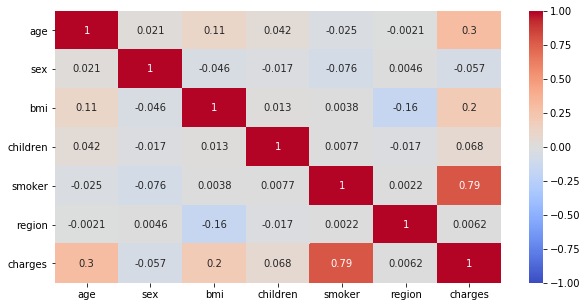

In [13]:
correlation = df.corr()
sns.heatmap(correlation, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.rcParams['figure.figsize'] = (10,5)
plt.show()

---------------------------------------------------------------------------

# Data Visualization

Smoker correlated most to charges. Check each variables per smoker status.

## [1] Distribusion of Charges

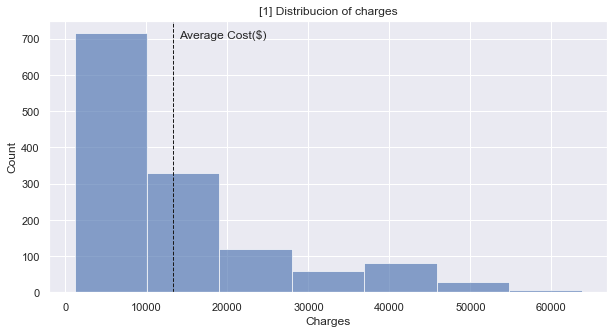

In [14]:
sns.set(style="darkgrid")

x = df['charges']
plt.hist(x, bins=7, alpha=0.65)
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(x=14000, y=700, s='Average Cost($)')
plt.rcParams['figure.figsize'] = (10,5)
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('[1] Distribucion of charges')
plt.show()

## [2] Age

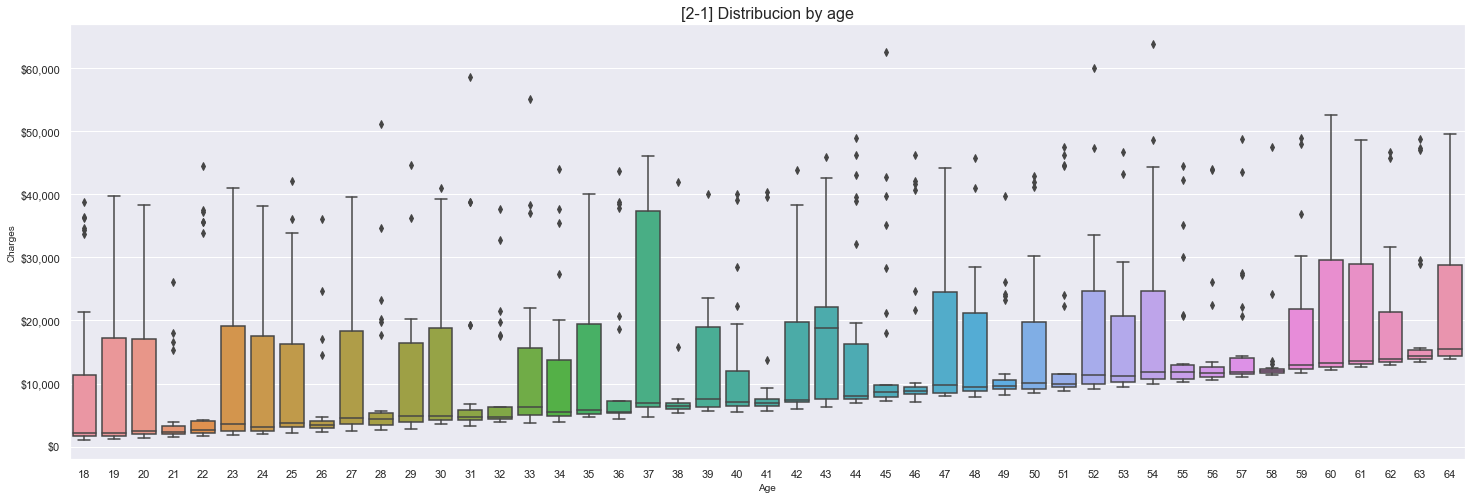

In [16]:
sns.set(style="darkgrid")
ax = sns.boxplot(x = 'age', y = 'charges', data = df)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.rcParams['figure.figsize'] = (25,8)
plt.xlabel('Age', fontsize = 10)
plt.ylabel('Charges', fontsize = 10)
plt.title('[2-1] Distribucion by age' , fontsize = 16)
plt.show()

[2-1] Minimum cost gets higher as age gets older.

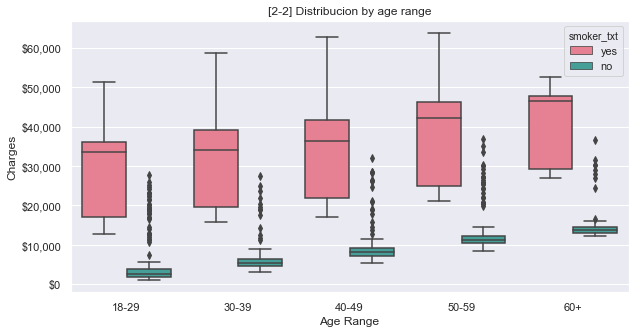

In [56]:
sns.set(style="darkgrid")
ax = sns.boxplot (x='agerange', y = 'charges', hue='smoker_txt', data = df, palette="husl")
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
df['agerange'] = pd.Categorical(df['agerange'], ["18-29", "30-39", "40-49","50-59","60+"])
df.sort_values("agerange")

plt.rcParams['figure.figsize'] = (10,5)
plt.xlabel('Age Range')
plt.ylabel('Charges')
plt.title('[2-2] Distribucion by age range')
plt.show()

[2-2] Compare smoker and age. In any age range, smoker patients spend much more than non-smoker.

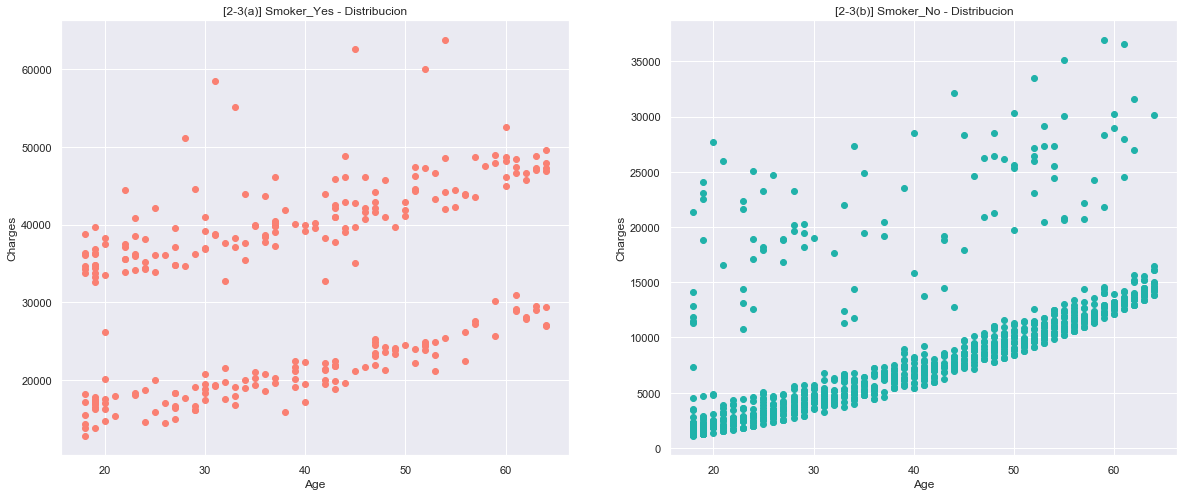

In [22]:
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (20,8)

plt.subplot(1, 2, 1)
x= smoker_yes['age']
y= smoker_yes['charges']
plt.scatter (x,y, color ='salmon')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('[2-3(a)] Smoker_Yes - Distribucion')

plt.subplot(1, 2, 2)
x= smoker_no['age']
y= smoker_no['charges']
plt.scatter (x,y, color ='lightseagreen')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('[2-3(b)] Smoker_No - Distribucion')

plt.show()

[2-3]
* Smoker shows two clusters, BMI is related, refer [4-4] chart for more details.
* Non-smoker are spending more as ages gets older.  
* Non-smoker outlier could be due to accident, other health condition etc. Need to research if there is any trend.

### Non-Smoker outliers

In [52]:
# Why Smoker_No group has outliers? What is the trend? 

Q1 = smoker_no.quantile(0.25)
Q3 = smoker_no.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 -(1.5 * IQR) 
upper_bound = Q3 +(1.5 * IQR)

nonsmoker_outlier = smoker_no.loc[smoker_no['charges'] > upper_bound['charges']]
nonsmoker_outlier = nonsmoker_outlier.sort_values(by=['bmi'], ascending= True)
nonsmoker_outlier.head(5)

,age,sex,bmi,children,smoker,region,charges,agerange,gender,smoker_txt,region_name,bmi_category
140,34,0,22.42,2,0,4,27375.90478,30-39,male,no,northeast,Healthy Weight
219,24,1,23.21,0,0,2,25081.76784,18-29,female,no,southeast,Healthy Weight
688,47,1,24.10,1,0,1,26236.57997,40-49,female,no,southwest,Healthy Weight
468,28,1,24.32,1,0,4,23288.92840,18-29,female,no,northeast,Healthy Weight
62,64,0,24.70,1,0,3,30166.61817,60+,male,no,northwest,Healthy Weight


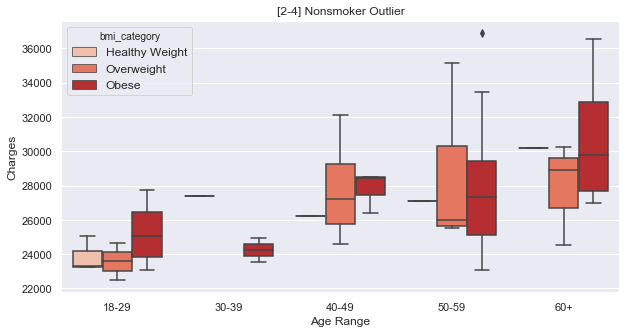

Obese             0.528401
Overweight        0.288490
Healthy Weight    0.168161
Underweight       0.014948
Name: bmi_category, dtype: float64


In [59]:
plt.rcParams['figure.figsize'] = (10,5)
ax = sns.boxplot(x=nonsmoker_outlier['agerange'], y=nonsmoker_outlier['charges'], 
                     hue =nonsmoker_outlier['bmi_category'], palette="Reds")
nonsmoker_outlier['agerange'] = pd.Categorical(nonsmoker_outlier['agerange'], ["18-29", "30-39", "40-49","50-59","60+"])
nonsmoker_outlier.sort_values("agerange")
plt.rc('legend',fontsize='medium')
plt.xlabel('Age Range')
plt.ylabel('Charges')
plt.title('[2-4] Nonsmoker Outlier')
plt.show()

print(df['bmi_category'].value_counts(normalize=True))

[2-4] Outliers are more occupied by "Overweight" and "Obese". However total % of those two groups are about 80%. Thus, this could be related to some other factors, need additional information for the conclusion.

# [3] Gender
* There is no difference between gender.

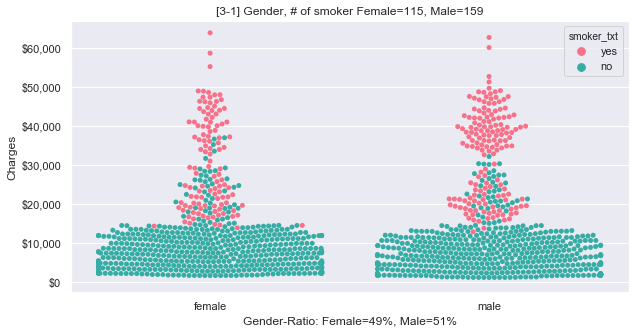

In [34]:
sns.set(style="darkgrid")
ax = sns.swarmplot(x=df['gender'], y=df['charges'], hue=df['smoker_txt'], palette="husl")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.rcParams['figure.figsize'] = (10,5)
plt.rc('legend',fontsize='medium')
plt.xlabel('Gender-Ratio: Female=49%, Male=51%')
plt.ylabel('Charges')
plt.title('[3-1] Gender, # of smoker Female=115, Male=159')
plt.show()

## [4] BMI

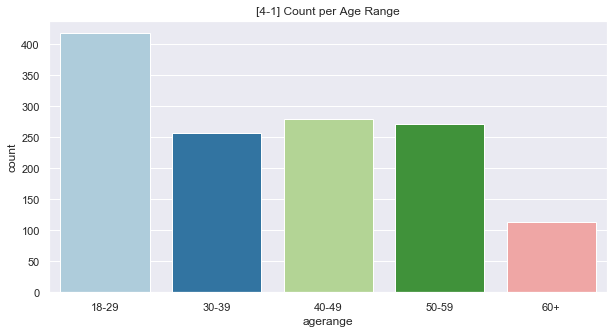

In [60]:
sns.set(style="darkgrid",palette="Paired")
ax = sns.countplot(x="agerange", data=df)
df['agerange'] = pd.Categorical(df['agerange'], ["18-29", "30-39", "40-49","50-59","60+"])
df.sort_values("agerange")
plt.rcParams['figure.figsize'] = (10,5)
plt.title('[4-1] Count per Age Range')
plt.show()

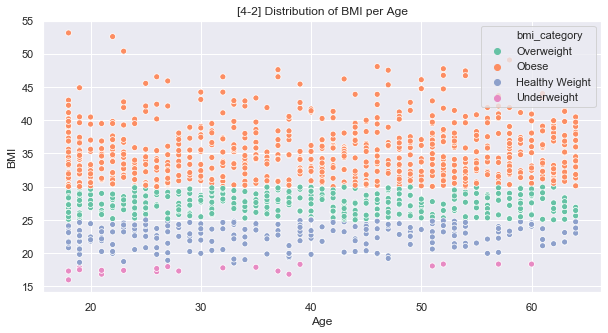

In [33]:
sns.set(style="darkgrid")
ax = sns.scatterplot(x=df['age'], y=df['bmi'], hue=df['bmi_category'], palette="Set2")

plt.rcParams['figure.figsize'] = (10,5)
plt.rc('legend',fontsize='medium')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('[4-2] Distribution of BMI per Age')
plt.show()

[4-2] Bar Chart ([4-1] Count per Age Range) shows that 18-29 occupies more patients than others. However "[4-2] Distribution of BMI per Age" shows same ratio over BMI Category across age.

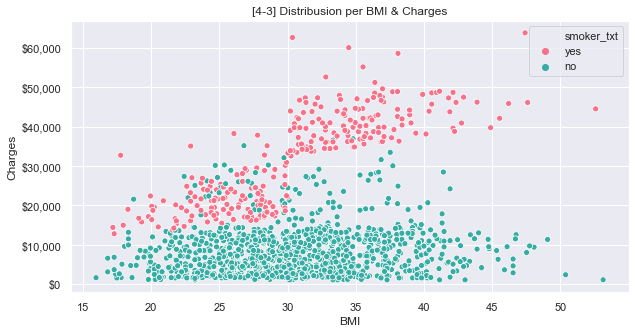

In [17]:
sns.set(style="darkgrid")
ax = sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker_txt'], palette="husl")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.rcParams['figure.figsize'] = (10,5)
plt.rc('legend',fontsize='medium')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('[4-3] Distribusion per BMI & Charges')
plt.show()

[4-3] When BMI exceeds 30, smoker spend a lot more. Two clusters are made by BMI.

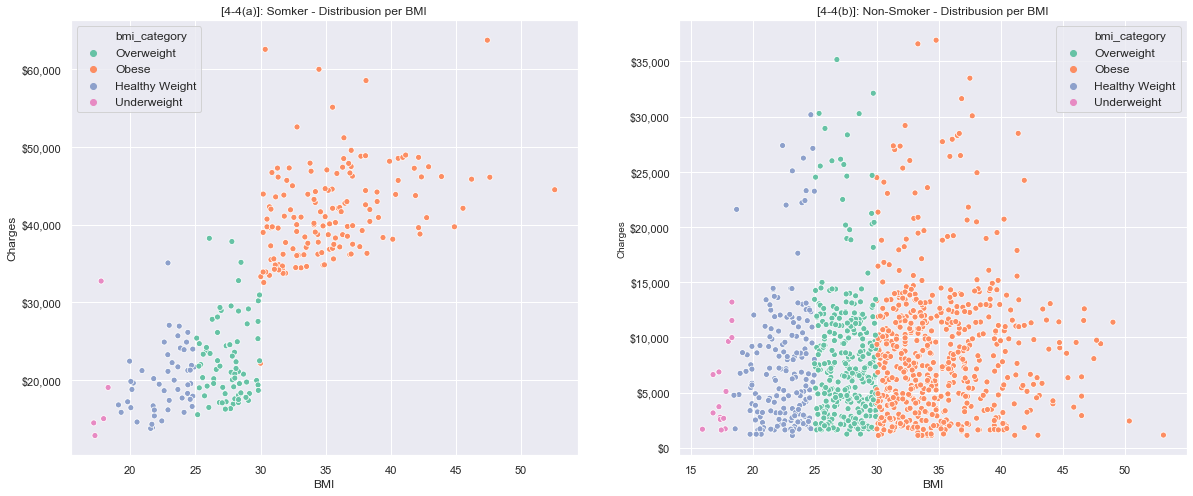

In [30]:
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (20,8)
plt.rc('legend',fontsize='medium')

plt.subplot(1, 2, 1)
ax = sns.scatterplot(x=smoker_yes['bmi'], y=smoker_yes['charges'], hue=df['bmi_category'], palette="Set2")
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('[4-4(a)]: Somker - Distribusion per BMI')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.subplot(1, 2, 2)
ax = sns.scatterplot(x=smoker_no['bmi'], y=smoker_no['charges'], hue=df['bmi_category'], palette="Set2")
plt.xlabel('BMI')
plt.ylabel('Charges', fontsize=10)
plt.title('[4-4(b)]: Non-Smoker - Distribusion per BMI')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.show()

[4-4]
* When comparing BMI per smoking status, Smoker & Obese combination became much more costly than other groups.
* On the other hand, Non-Smoker group does not show same trend.

## [5] Region

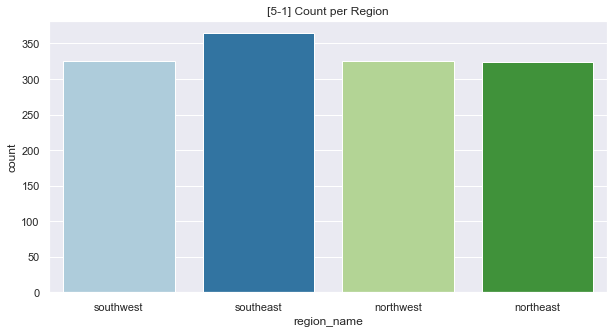

In [29]:
sns.set(style="darkgrid",palette="Paired")
ax = sns.countplot(x="region_name", data=df)
plt.rcParams['figure.figsize'] = (10,5)
plt.title('[5-1] Count per Region')
plt.show()

[5-1] Similar distribution across region.

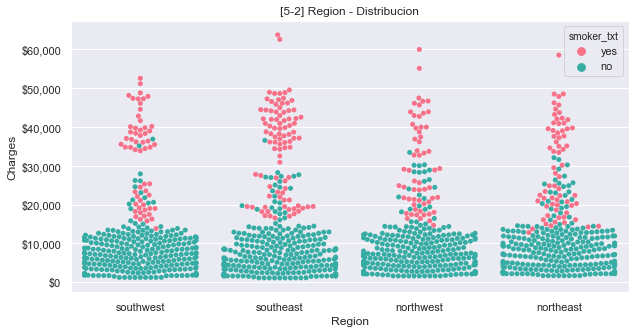

In [28]:
sns.set(style="darkgrid")
ax = sns.swarmplot (x='region_name', y = 'charges', hue='smoker_txt', data = df, palette="husl")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.rcParams['figure.figsize'] = (10,5)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('[5-2] Region - Distribucion')
plt.show()

[5-2] Smokers pay higher charges across the Region.  NO matter where the patients locate, smokers spend higher amount for the treatments.

## [6] Number of Child

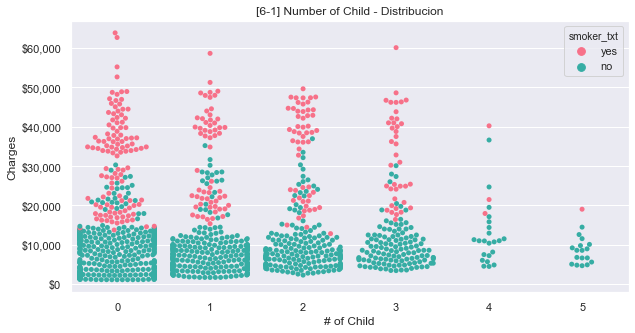

In [18]:
sns.set(style="darkgrid")
ax = sns.swarmplot (x='children', y = 'charges', hue='smoker_txt', data = df, palette="husl")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.rcParams['figure.figsize'] = (10,5)
plt.xlabel('# of Child')
plt.ylabel('Charges')
plt.title('[6-1] Number of Child - Distribucion')
plt.show()

[6-1] Smokers pays more, and number of child seems affecting the spending towards healthcare since minimum is higher than when number of child is zero.

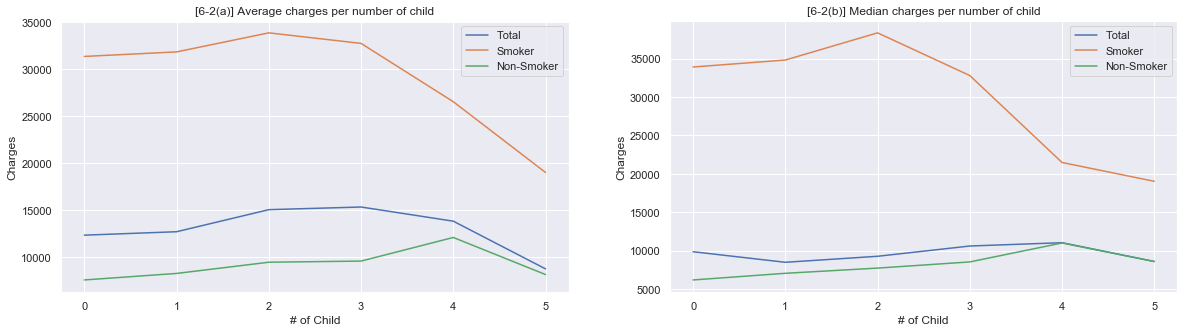

In [19]:
average_total_numchild = round(df.groupby(['children'])['charges'].mean(),2)
average_smoker_numchild = round(smoker_yes.groupby(['children'])['charges'].mean(),2)
average_nonsmoker_numchild = round(smoker_no.groupby(['children'])['charges'].mean(),2)

median_total_numchild = round(df.groupby(['children'])['charges'].median(),2)
median_smoker_numchild = round(smoker_yes.groupby(['children'])['charges'].median(),2)
median_nonsmoker_numchild = round(smoker_no.groupby(['children'])['charges'].median(),2)

plt.rcParams['figure.figsize'] = (20,5)

plt.subplot(1, 2, 1)
plt.plot(average_total_numchild, label = 'Total')
plt.plot(average_smoker_numchild, label = 'Smoker')
plt.plot(average_nonsmoker_numchild, label = 'Non-Smoker')
plt.xlabel('# of Child')
plt.ylabel('Charges')
plt.legend(loc='best')
plt.title('[6-2(a)] Average charges per number of child')

plt.subplot(1, 2, 2)
plt.plot(median_total_numchild, label = 'Total')
plt.plot(median_smoker_numchild, label = 'Smoker')
plt.plot(median_nonsmoker_numchild, label = 'Non-Smoker')
plt.xlabel('# of Child')
plt.ylabel('Charges')
plt.title('[6-2(b)] Median charges per number of child')
plt.legend(loc='best')

plt.show()

[6-2] Except the group who has 5 children, spending amount is higher and higher. Less smokers as patients have a greater number of child, this could be relating to the cost.

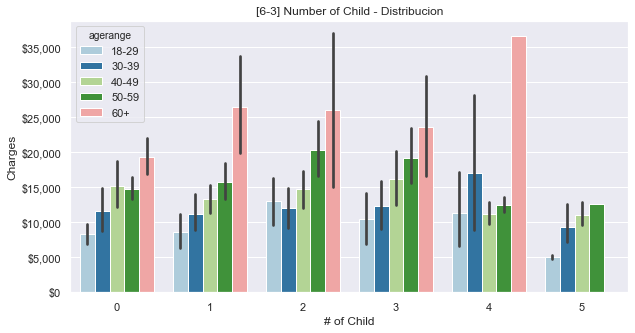

In [63]:
sns.set(style="darkgrid")
ax = sns.barplot (x='children', y = 'charges', hue='agerange', data = df, palette="Paired")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.rcParams['figure.figsize'] = (10,5)
plt.xlabel('# of Child')
plt.ylabel('Charges')
plt.title('[6-3] Number of Child - Distribucion')
plt.show()

[6-3] 6-2 showing number of child shows charges decrease when number is 5. When looking by age range, there is no 60+ in the group who has 5 children.  This could be the reason why charges decrease.

---------------------------------------------------------------------------

# Prediction

In [14]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

* R-squared is 0.751. Age, BMI, Number of Children, and Smoking shows that p-value is close to zero.

In [15]:
X = df[['age','sex','bmi','children','smoker','region']]
y = df['charges']

X= sm.add_constant(X)
model= sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        18:09:04   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.336e+04   1087.672    -12.284      0.000   -1.55e+04   -1.12e+04
age          257.2881     11.886     21.647      0.000     233.971     280.605
sex          131.1106    332.811      0.394      0.694    -521.780     784.001
bmi          332.5701     27.722     11.997      0.000     278.186     386.954
children     479.3694    137.644      3.483      0.001     209.346     749.393
smoker      2.382e+04    411.843     57.839      0.000     2.3e+04    2.46e+04
region       353.6400    151.927      2.328      0.020      55.598     651.682
==============================================================================
Omnibus:                      299.003   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.975
Skew:                           1.207   Prob(JB):                    9.17e-156
Kurtosis:                       5.642   Cond. No.                         339.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
X = df[['age','bmi','smoker','children']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 0)
lm = LinearRegression()  
lm.fit(X_train,y_train)
# print(lm.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,256.985093
bmi,347.338145
smoker,23357.087409
children,531.554235


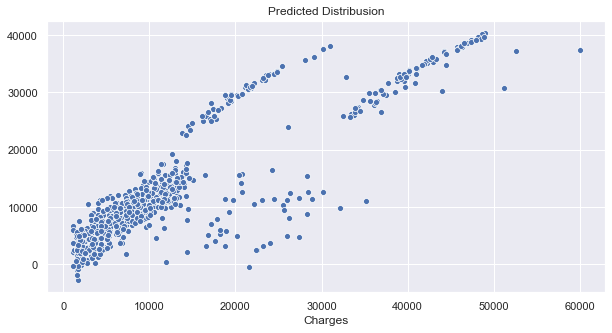

In [41]:
plt.figure(figsize=(10,5))
predictions = lm.predict(X_test)
sns.scatterplot(y_test,predictions)
plt.title('Predicted Distribusion')
plt.xlabel('Charges')
plt.show()

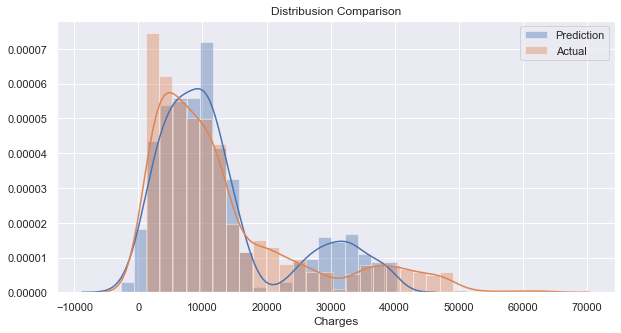

In [59]:
sns.distplot(predictions, label = 'Prediction')
sns.distplot(df['charges'], label = 'Actual')
plt.xlabel('Charges')
plt.title('Distribusion Comparison')
plt.legend(loc='best')

plt.show()

* Compare the charges between prediction and actual data, it almost synchronized.

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4088.335658382616
MSE: 34595007.64613964
RMSE: 5881.752089823205


-------------------------------------

# [Conclusion]

###  Correlation

* Data shows that "Smoking" is the most correlate variable in the data set.

###   Data Visualization

- More spending towards healthcare as age gets older.  [2-1]
- When comparing the age group and smoking status, smokers spend much higher amount than non-smokers. Age range 18-29 smokers spend as much charges as 60+ non-smokers.  [2-2]
- Smoker group has two clusters. Non-smokers trend is spend more as they get older.  [2-3]
- Regardlress of the age, almost 50% is "Obese", about 25% each for "Overwegiht" and "Healthy Wegiht", rest of the small% are "Underweight". [4-1]
- Two smokers' clusters noticed in [2-3] is made by BMI. When BMI is higher than 30 (Obese), patients spend minimum of USD 30,000, where majority of non-smokers spent less than half.  [4-4]
- Except the group who has 5 children, spending amount is higher and higher. Less smokers as patients have more number of child, this could be relating to the cost. Or when looking by age range, there is no 60+ in the group who has 5 children.  This could also be the reason why charges decrease. [6]
- Gender and Region do not affect towards spending.  [3][5]

### Prediction
* R-square is 0.751. 
* Compare the charges between prediction and actual data, it almost synchronized.